# 0.0 Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 0.1 Data Load

In [2]:
df_raw = pd.read_csv('../../projeto/data_raw/installments_payments.csv')

In [3]:
df_train = pd.read_csv('../../projeto/data_raw/application_train.csv')

In [4]:
df_description = pd.read_csv('../../projeto/data_raw/HomeCredit_columns_description.csv', encoding='latin1', index_col = 0)

# 1.0 Data Description

In [5]:
df1 = df_raw.copy()

In [6]:
df1.head().T

,0,1,2,3,4
SK_ID_PREV,1054186.00,1330831.000,2085231.0,2452527.00,2714724.000
SK_ID_CURR,161674.00,151639.000,193053.0,199697.00,167756.000
NUM_INSTALMENT_VERSION,1.00,0.000,2.0,1.00,1.000
NUM_INSTALMENT_NUMBER,6.00,34.000,1.0,3.00,2.000
DAYS_INSTALMENT,-1180.00,-2156.000,-63.0,-2418.00,-1383.000
DAYS_ENTRY_PAYMENT,-1187.00,-2156.000,-63.0,-2426.00,-1366.000
AMT_INSTALMENT,6948.36,1716.525,25425.0,24350.13,2165.040
AMT_PAYMENT,6948.36,1716.525,25425.0,24350.13,2160.585


## 1.1 Feature description

In [7]:
pd.set_option('display.max_colwidth', None)
df_description.loc[ df_description['Table'] == 'installments_payments.csv' ].reset_index(drop = 1).head(50)

,Table,Row,Description,Special
0,installments_payments.csv,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)",hashed
1,installments_payments.csv,SK_ID_CURR,ID of loan in our sample,hashed
2,installments_payments.csv,NUM_INSTALMENT_VERSION,Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed,NaN
3,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
4,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was supposed to be paid (relative to application date of current loan),time only relative to the application
5,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit paid actually (relative to application date of current loan),time only relative to the application
6,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of previous credit on this installment,NaN
7,installments_payments.csv,AMT_PAYMENT,What the client actually paid on previous credit on this installment,NaN


## 1.2 Data shape

In [8]:
df1.shape

(13605401, 8)

## 1.3 Check NaN

In [9]:
df1.isna().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

## 1.4 Describe

In [10]:
df1.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


# 2.0 Feature Engineering

In [11]:
df2 = df1.copy()

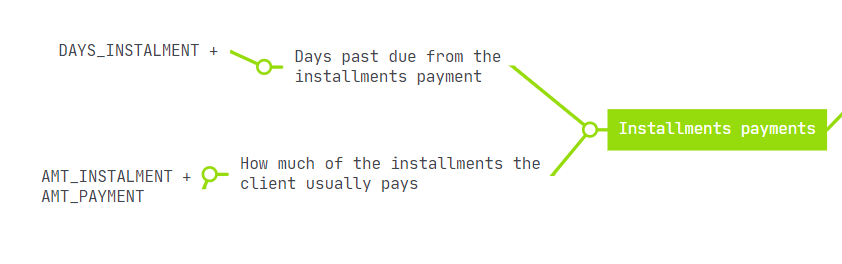

The features and EDA of credit card balance will be developed taking into consideration the business assumptions

In [12]:
df2.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

In [13]:
def installments_payments_feature_engineering(df_cleaned):

    df_featured = df_cleaned.copy()

    df_featured['DPD_INSTALLMENTS'] = df_featured['DAYS_ENTRY_PAYMENT'] - df_featured['DAYS_INSTALMENT']

    df_featured['FRAC_PAID_INSTALLMENTS'] = df_featured['AMT_PAYMENT'] / df_featured['AMT_INSTALMENT']
    df_featured['FRAC_PAID_INSTALLMENTS'] = df_featured.apply(lambda x: np.nan if x['AMT_INSTALMENT'] == 0 else x['FRAC_PAID_INSTALLMENTS'], axis = 1)

    df_featured = df_featured.groupby(['SK_ID_CURR']).agg(DPD_INSTALLMENTS = ('DPD_INSTALLMENTS','mean'),
                                                          FRAC_PAID_INSTALLMENTS = ('FRAC_PAID_INSTALLMENTS','mean'),
                                                          PREV_CRED_INSTALLMENTS = ('SK_ID_PREV','count')).reset_index()

 
    return df_featured

In [14]:
def join_train_installments(df_train, df_installments):

    df_train = df_train[['SK_ID_CURR','TARGET']]

    df_merged = df_train.merge(df_installments, on = 'SK_ID_CURR', how = 'left', validate = 'one_to_one')

    return df_merged

In [15]:
def feature_analysis(df_final):

    df_analysis = df_final.copy()

    for col in df_analysis.select_dtypes('number').columns:
        if col not in ['SK_ID_CURR','TARGET']:	
            col_name = f'{col}_q'
            df_analysis[col_name] = pd.qcut(df_analysis[col], q = 4, duplicates='drop',labels=False)
            df_analysis.groupby(col_name)['TARGET'].mean().plot()
            plt.axhline(df_analysis['TARGET'].mean(), color = 'red', linestyle = '--')
            plt.ylim(bottom =0)
            plt.title(col)
            plt.show()


In [16]:
df_featured = installments_payments_feature_engineering(df2)

In [17]:
df_final = join_train_installments(df_train, df_featured)

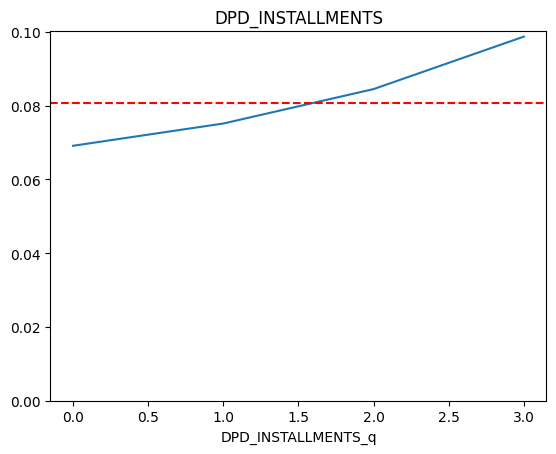

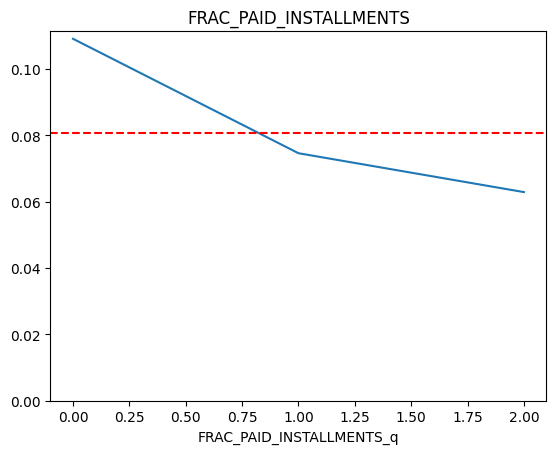

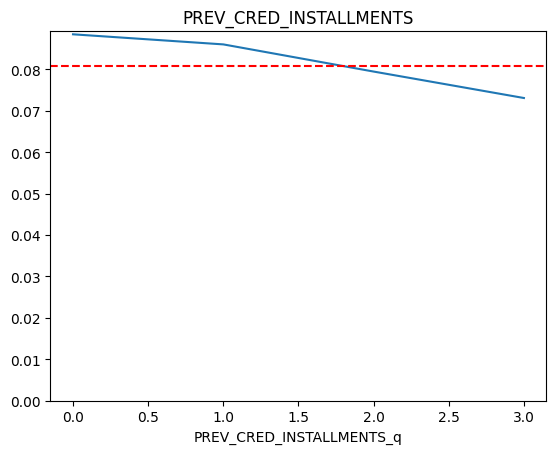

In [18]:
feature_analysis(df_final)

In [19]:
df_featured.to_parquet('../../projeto/data_featured/installments_payments.parquet') 